# Laboratorio de regresión lineal

|                |   |
:----------------|---|Antonio Ortegón   |   |2009202     |  
 |749730  * |   |   |

La regresión lineal es una heramienta útil para predecir una respuesta cuantitativa. A pesar de que existen soluciones más modernas, la regresión lineal se sigue usando, pues sirve como un punto de partida para comparar otras herramientas.

Se debe comprender cómo funciona la regresión antes de empezar a estudiar métodos de aprendizaje estadístico más complejos.

1. Descarga el archivo de publicidad y carga los datos (Advertising.csv).

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

No hay ninguna realacion, los presupuestos que se tienen están muy disparejos

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Sí

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$

Por ejemplo, si decimos que $X$ se refiere a lo gastado en publicidad de TV y que $Y$ son las ventas, podemos buscar:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir ventar futuras basándonos en lo gastado en publicidad en TV usando
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

El archivo de publicidad contiene observaciones de 200 mercados y presupuestos usados para publicidad en 3 medios. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
datos=pd.read_csv("Advertising.csv")
datos



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [30]:
# genero el gráfio (ayuda con chat)
#Tv es la X
x=datos["TV"]
y=datos["sales"] 
x, y

(0      230.1
 1       44.5
 2       17.2
 3      151.5
 4      180.8
        ...  
 195     38.2
 196     94.2
 197    177.0
 198    283.6
 199    232.1
 Name: TV, Length: 200, dtype: float64,
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: sales, Length: 200, dtype: float64)

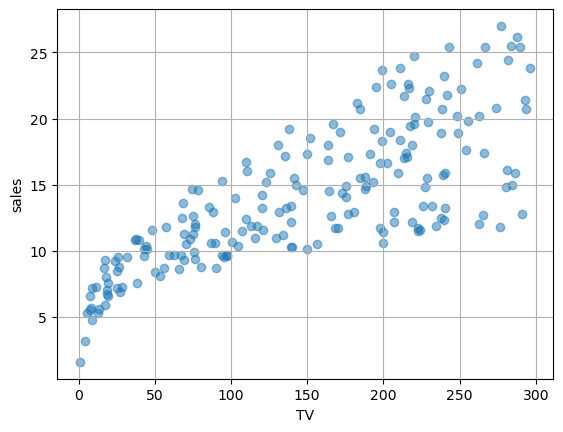

In [31]:
n = len(y)
plt.scatter(x, y, alpha=.5) #genera los puntos
plt.xlabel("TV")
plt.ylabel("sales")
plt.grid()
plt.show()


In [32]:
#Hacer la regresion lineal
n=len(x)
ones=np.ones([n,1])
x_factor=np.reshape(x,[n,1])
X=np.hstack((ones,x_factor)) 
y_vector=np.reshape(y, [n,1]) #y pasa a ser columna de 1 y x

n,p=X.shape #n filas, p paramertos
beta=np.random.rand(p) # empezar a encontrar valores

def funcion(beta, X, y): 
    beta=np.reshape(beta, [p,1])
    y_pre=X@beta
    error=y_pre-y
    rss=error.T@error
    return rss[0, 0]
rss=opt.minimize(funcion, beta, args=(X, y_vector))
rss

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2102.5305831326536
        x: [ 7.033e+00  4.754e-02]
      nit: 3
      jac: [ 0.000e+00  3.052e-05]
 hess_inv: [[ 9.868e-03 -5.011e-05]
            [-5.011e-05  3.408e-07]]
     nfev: 117
     njev: 36

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `minimize` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [35]:
B1=np.sum((x-np.mean(x))*(y-np.mean(y))/np.sum((x-np.mean(x))**2))
Bo=np.mean(y)-B1*np.mean(x)
B1, Bo

(0.047536640433019736, 7.0325935491276965)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

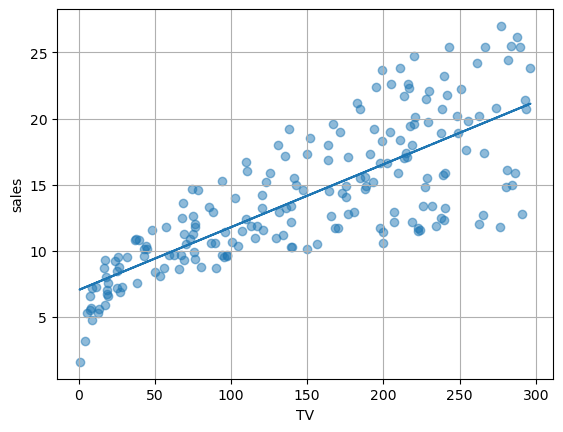

In [37]:
def f(x) :
    return 7.033 + 4.754e-02*x

plt.figure()
plt.scatter(x_factor, y, alpha=.5) #genera los puntos
plt.plot(x_factor, f(x_factor))
plt.xlabel("TV")
plt.ylabel("sales")
plt.grid()
plt.show()

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

*Poblacion*: todo

*Muestra*: es un subconjunto de la poblacion, es decir una seleccion y sobre los cuales se va a llegar acabao un estudio

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Que con una población haces de todos en general, es decir de todo el circulo y con la muestra es agarras una parte del circulo y lo analizas

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desciación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-2}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [53]:
Var= rss.fun/(n-2)
SeBo=np.sqrt(Var*((1/n)+(np.mean(x)**2)/np.sum((x-np.mean(x))**2)))
SeB1=np.sqrt(Var/np.sum((x-np.mean(x))**2))
Var, SeBo, SeB1


(10.618841328952795, 0.45784294027362027, 0.002690607187797704)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm \text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [56]:
#Para Bo
#intervalo de Bo
Arriba1=Bo-2*(SeBo)
Abajo1=Bo+2*(SeBo)
#Intervalo Ba
Arriba2=B1-2*(SeB1)
Abajo2=B1+2*(SeB1)
Arriba1, Abajo1

(6.116907668580456, 7.948279429674937)

In [57]:
Arriba2, Abajo2

(0.042155426057424325, 0.05291785480861515)

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipotesis nula es mi primera hipotesis, lo que busco 

Mientras que la alternativa es lq que busca rechazar la a la alternativa

Para probar la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [67]:
tBo=(Bo-0)/SeBo
tBo

15.360275174112795

In [68]:
tB1=(B1-0)/SeB1
tB1

17.66762560087007

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-2))`

In [72]:
from scipy import stats
p_Bo=2*(1-stats.t.cdf(np.abs(tBo), n-2))
p_B1=2*(1-stats.t.cdf(np.abs(tB1), n-2))
p_Bo, p_B1

(0.0, 0.0)

¿Se rechaza la hipótesis nula? ¿Qué significa? No, porque es casi 0 lo que quiere decir que sí hay una relación entre las dos variables

### Verificando la precisión del modelo

Si ya tenemos unos coeficientes de regresión estimados y ya verificamos que la probabilidad de que sí hay relación entre predictor y respuesta es alta. ¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

Calcula el estadístico $R^2$. ¿Cuánta varianza quedó sin explicar?

In [79]:
TSS=np.sum((y-np.mean(y))**2)
R2=1-(rss.fun/TSS)
R2


0.6118750508498306

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

## Regresión Radio

### Coeficientes estimados

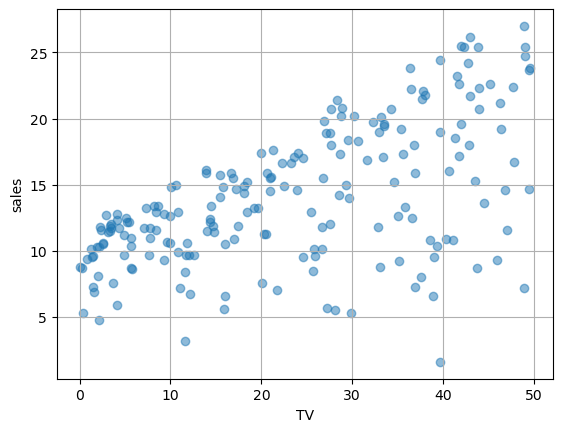

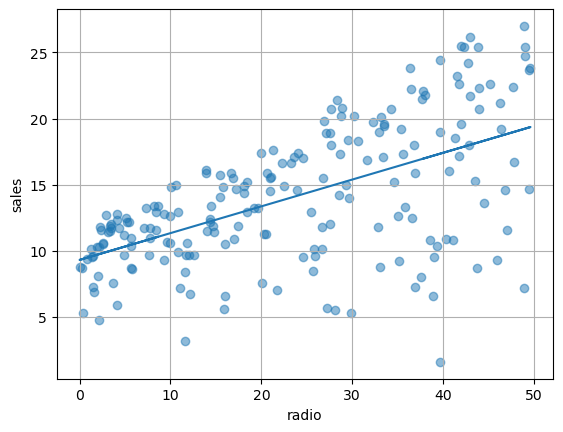

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3618.4795490251036
        x: [ 9.312e+00  2.025e-01]
      nit: 5
      jac: [ 0.000e+00 -1.526e-04]
 hess_inv: [[ 3.914e-06 -3.674e-06]
            [-3.674e-06  3.668e-06]]
     nfev: 84
     njev: 28

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
datos2=pd.read_csv("Advertising.csv")

x_radio=datos2["radio"]
y_radio=datos2["sales"] 
n_radio = len(y_radio)
plt.scatter(x_radio, y_radio, alpha=.5) #genera los puntos
plt.xlabel("TV")
plt.ylabel("sales")
plt.grid()
plt.show()
#Hacer la regresion lineal
n=len(x_radio)
ones_radio=np.ones([n_radio,1])
x_factor_radio=np.reshape(x_radio,[n_radio,1])
X_radio=np.hstack((ones_radio,x_factor_radio)) 
y_vector_radio=np.reshape(y_radio, [n_radio,1]) #y pasa a ser columna de 1 y x

n_radio,p_radio=X_radio.shape #n filas, p paramertos
beta_radio=np.random.rand(p_radio) # empezar a encontrar valores

def funcion_radio(beta_radio, X_radio, y_radio): 
    beta_radio=np.reshape(beta_radio, [p_radio,1])
    y_pre_radio=X_radio@beta_radio
    error_radio=y_pre_radio-y_radio
    rss_radio=error_radio.T@error_radio
    return rss_radio[0, 0]
rss_radio=opt.minimize(funcion_radio, beta_radio, args=(X_radio, y_vector_radio))
B1_radio=np.sum((x_radio-np.mean(x_radio))*(y_radio-np.mean(y_radio))/np.sum((x_radio-np.mean(x_radio))**2))
Bo_radio=np.mean(y_radio)-B1_radio*np.mean(x_radio)
B1_radio, Bo_radio
def f_radio(x) :
    return Bo_radio + B1_radio*x_radio
plt.figure()
plt.scatter(x_factor_radio, y_radio, alpha=.5) #genera los puntos
plt.plot(x_factor_radio, f_radio(x_factor_radio))
plt.xlabel("radio")
plt.ylabel("sales")
plt.grid()
plt.show()
rss_radio

### Error estandar de los coeficientes

In [85]:
Var_radio= rss_radio.fun/(n_radio-2)
SeBo_radio=np.sqrt(Var_radio*((1/n_radio)+(np.mean(x_radio)**2)/np.sum((x_radio-np.mean(x_radio))**2)))
SeB1_radio=np.sqrt(Var_radio/np.sum((x_radio-np.mean(x_radio))**2))
Var_radio, SeBo_radio, SeB1_radio

(18.27514923750052, 0.5629004962718723, 0.02041130636009068)

### Intervalos de confianza

In [87]:

Arriba1_radio=Bo_radio-2*(SeBo_radio)
Abajo1_radio=Bo_radio+2*(SeBo_radio)

Arriba2_radio=B1_radio-2*(SeB1_radio)
Abajo2_radio=B1_radio+2*(SeB1_radio)
Arriba1_radio, Abajo1_radio

(8.185837102614538, 10.437439087702028)

In [88]:
Arriba2_radio, Abajo2_radio

(0.16167317067225828, 0.24331839611262102)

### Estadisticos t

In [90]:
tBo_radio=(Bo_radio-0)/SeBo_radio
tB1_radio=(B1_radio-0)/SeB1_radio
tBo_radio, tB1_radio

(16.54224531125818, 9.920765472824936)

### p-values

In [92]:
from scipy import stats
p_Bo_radio=2*(1-stats.t.cdf(np.abs(tBo_radio), n-2))
p_B1_radio=2*(1-stats.t.cdf(np.abs(tB1_radio), n-2))
p_Bo_radio, p_B1_radio

(0.0, 0.0)

### Observaciones

No se rechaza la hipotesis nula porque ambas son 0 y quiere decir que hay una relación

## Regresion newspaper

### Coeficientes estimados

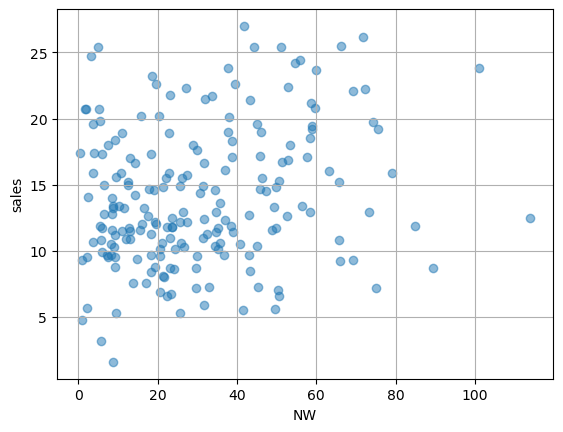

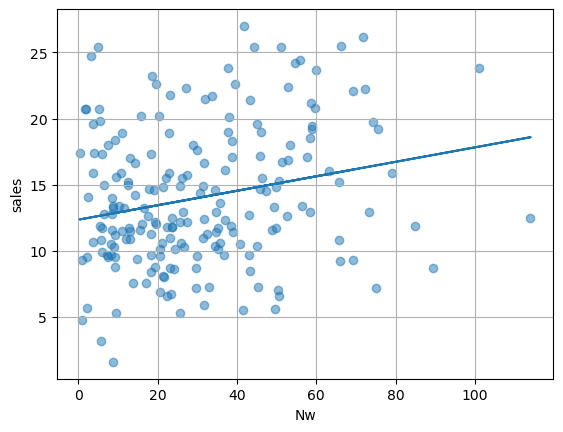

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5134.804544111967
        x: [ 1.235e+01  5.469e-02]
      nit: 7
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.779e-03 -3.411e-05]
            [-3.411e-05  1.842e-06]]
     nfev: 94
     njev: 31

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
datos3=pd.read_csv("Advertising.csv")
x_nw=datos3["newspaper"]
y_nw=datos3["sales"] 
n_nw= len(y_nw)
plt.scatter(x_nw, y_nw, alpha=.5) #genera los puntos
plt.xlabel("NW")
plt.ylabel("sales")
plt.grid()
plt.show()
#Hacer la regresion lineal
n_nw=len(x_nw)
ones_nw=np.ones([n_nw,1])
x_factor_nw=np.reshape(x_nw,[n_nw,1])
X_nw=np.hstack((ones_nw,x_factor_nw)) 
y_vector_nw=np.reshape(y_nw, [n_nw,1]) #y pasa a ser columna de 1 y x

n_nw,p_nw=X_nw.shape #n filas, p paramertos
beta_nw=np.random.rand(p_nw) # empezar a encontrar valores

def funcion_nw(beta_nw, X_nw, y_nw): 
    beta_nw=np.reshape(beta_nw, [p_nw,1])
    y_pre_nw=X_nw@beta_nw
    error_nw=y_pre_nw-y_nw
    rss_nw=error_nw.T@error_nw
    return rss_nw[0, 0]
rss_nw=opt.minimize(funcion_nw, beta_nw, args=(X_nw, y_vector_nw))
B1_nw=np.sum((x_nw-np.mean(x_nw))*(y_nw-np.mean(y_nw))/np.sum((x_nw-np.mean(x_nw))**2))
Bo_nw=np.mean(y_nw)-B1_nw*np.mean(x_nw)
def f_nw(x) :
    return Bo_nw + B1_nw*x_nw

plt.figure()
plt.scatter(x_factor_nw, y_nw, alpha=.5) #genera los puntos
plt.plot(x_factor_nw, f_nw(x_factor_nw))
plt.xlabel("Nw")
plt.ylabel("sales")
plt.grid()
plt.show()
rss_nw



### Erros estándar de los coeficientes

In [99]:
Var_nw= rss_nw.fun/(n_nw-2)
SeBo_nw=np.sqrt(Var_nw*((1/n_nw)+(np.mean(x_nw)**2)/np.sum((x_nw-np.mean(x_nw))**2)))
SeB1_nw=np.sqrt(Var_nw/np.sum((x_nw-np.mean(x_nw))**2))
Var_nw, SeBo_nw, SeB1_nw

(25.93335628339377, 0.6214201876094362, 0.016575721876358206)

### Intervalos de confianza

In [101]:

Arriba1_nw=Bo_nw-2*(SeBo_nw)
Abajo1_nw=Bo_nw+2*(SeBo_nw)

Arriba2_nw=B1_nw-2*(SeB1_nw)
Abajo2_nw=B1_nw+2*(SeB1_nw)
Arriba1_nw, Abajo1_nw


(11.108566694059288, 13.594247444497032)

In [102]:
Arriba2_nw, Abajo2_nw


(0.02154165471955695, 0.08784454222498977)

### Estádisticos T

In [104]:
tBo_nw=(Bo_nw-0)/SeBo_nw
tB1_nw=(B1_nw-0)/SeB1_nw
tBo_nw, tB1_nw

(19.876095620248893, 3.29959074363341)

### P-values

In [106]:
from scipy import stats
p_Bo_nw=2*(1-stats.t.cdf(np.abs(tBo_nw), n-2))
p_B1_nw=2*(1-stats.t.cdf(np.abs(tB1_nw), n-2))
p_Bo_nw, p_B1_nw

(0.0, 0.0011481958688883687)

### Observaciones

No se rechaza la hipotesis porque las probabilidades son casi 0 o 0 

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la función `minimize` para estimar los coeficientes $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats
datos=pd.read_csv("Advertising.csv")
x_tv=datos["TV"]
x_r=datos["radio"]
x_p=datos["newspaper"] 
y=datos["sales"]
n=len(y)
ones=np.ones([n, 1])
x_factor_tv=np.reshape(x_tv, [n,1])
x_factor_r=np.reshape(x_r, [n,1])
x_factor_p=np.reshape(x_p, [n, 1])
X=np.hstack((ones, x_factor_tv, x_factor_r, x_factor_p))
y_vector=np.reshape(y, [n, 1])
n, p=X.shape
beta=np.random.rand(p)

def funcion(beta, X, y): 
    beta=np.reshape(beta, [p,1])
    y_pre=X@beta
    error=y_pre-y
    rss=error.T@error
    return rss[0, 0]
rss=opt.minimize(funcion, beta, args=(X, y_vector))
rss





  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 556.8252629034959
        x: [ 2.939e+00  4.576e-02  1.885e-01 -1.038e-03]
      nit: 12
      jac: [ 7.629e-06  1.526e-05  7.629e-06  1.450e-04]
 hess_inv: [[ 1.868e-03 -5.229e-06  1.410e-04 -1.306e-04]
            [-5.229e-06  1.572e-07 -7.419e-07  4.271e-07]
            [ 1.410e-04 -7.419e-07  1.188e-05 -1.039e-05]
            [-1.306e-04  4.271e-07 -1.039e-05  9.534e-06]]
     nfev: 342
     njev: 66

Calcula el RSS y RSE.

In [114]:
RSE= np.sqrt(rss.fun/(n-2))
TSS=np.sum((y-np.mean(y))**2)
R2=1-(rss.fun/TSS)
RSE, R2

(1.676976088840538, 0.8972106381787106)

Dada tu matriz $X$ que contiene todos los factores como columnas, utiliza el siguiente código para encontrar el error estándar de tus estimaciones

`var_beta = np.linalg.inv(X.T @ X) * rse**2`

`std_beta = np.sqrt(var_beta.diagonal())`

El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.

In [116]:
var_beta=np.linalg.inv(X.T@X)*RSE**2
std_beta=np.sqrt(var_beta.diagonal())
var_beta, std_beta

(array([[ 9.63040535e-02, -2.63043223e-04, -1.10422189e-03,
         -5.85051328e-04],
        [-2.63043223e-04,  1.92608319e-06, -4.42523913e-07,
         -3.23296087e-07],
        [-1.10422189e-03, -4.42523913e-07,  7.34043267e-05,
         -1.76208203e-05],
        [-5.85051328e-04, -3.23296087e-07, -1.76208203e-05,
          3.41205850e-05]]),
 array([0.31032894, 0.00138783, 0.00856763, 0.00584128]))

Calcula los estadísticos t y *p-values* de tus estimaciones.

In [156]:
t=rss.x/std_beta
p_0=2*(1-stats.t.cdf(np.abs(t[0]), n-2))
p_1=2*(1-stats.t.cdf(np.abs(t[1]), n-2))
p_2=2*(1-stats.t.cdf(np.abs(t[2]), n-2))
p_3=2*(1-stats.t.cdf(np.abs(t[3]), n-2))
t, p_0, p_1, p_2, p_3

(array([ 9.47025528, 32.97556942, 22.00491282, -0.1776161 ]),
 0.0,
 0.0,
 0.0,
 0.8592060545496132)

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en regresiones simples? ¿Por qué crees que existen estas diferencias?

Porque, no es lo mismo considerar un solo aspecto, cuando ya estás considerando varios aspectos en uno mismo, para probabilidades suben porque estás abarcando un mayor área del espacio muestreal. 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3